In [1]:
%load_ext autoreload
%autoreload 2
import sys
print(sys.executable)
import socket
print(socket.gethostname())
import os
os.chdir("/home/icb/alioguz.can/projects/campa_pt")

/home/icb/alioguz.can/miniconda3/envs/campa_pt/bin/python
gpusrv46.scidom.de


In [2]:
# import os
# os.environ["CUDA_VISIBLE_DEVICES"] = ""
# TF_ENABLE_ONEDNN_OPTS=0

In [3]:
from campa.tl import (
    Cluster,
    # Estimator,
    TorchEstimator,
    # Predictor,
    TorchPredictor,
    # Experiment,
    TorchExperiment,
    ModelComparator,
    # run_experiments,
    run_torch_experiments
)

/home/icb/alioguz.can/miniconda3/envs/campa_pt/lib/python3.9/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


In [4]:
from campa.data import MPPData
from campa.utils import init_logging
from campa.constants import campa_config

In [5]:
from pathlib import Path
# init logging with level INFO=20, WARNING=30
init_logging(level=30)
# read correct campa_config -- created with setup.ipynb
CAMPA_DIR = Path.cwd()
campa_config.config_fname = CAMPA_DIR / "notebooks/params/campa.ini"
print(campa_config)

Reading config from /ictstr01/home/icb/alioguz.can/projects/campa_pt/notebooks/params/campa.ini
CAMPAConfig (fname: /ictstr01/home/icb/alioguz.can/projects/campa_pt/notebooks/params/campa.ini)
EXPERIMENT_DIR: /home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments
BASE_DATA_DIR: /home/icb/alioguz.can/projects/campa_pt/notebooks/example_data
CO_OCC_CHUNK_SIZE: 10000000.0
data_config/exampledata: /home/icb/alioguz.can/projects/campa_pt/notebooks/params/ExampleData_constants.py



In [6]:
# import tensorflow as tf
# from tensorflow.keras import backend as K
# import torch
# torch.cuda.empty_cache()
# # Clear the current session
# K.clear_session()

# # Optionally, reset the default graph
# tf.compat.v1.reset_default_graph()

TF

In [7]:
# # get Experiments from config
# exps = Experiment.get_experiments_from_config("notebooks/params/example_experiment_params.py")
# run_experiments(exps, mode="trainval")

In [8]:
# exp = exps[1]
# print("Experiment name:", exp.name)
# print("Experiment is stored in:", exp.full_path)

In [9]:
# print(Estimator(exps[0]).model.summary)

In [10]:
# est = Estimator(exps[1])
# _ = est.train_model()
# pred_torch = Predictor(exps[1])
# pred_torch.evaluate_model()
# cl = Cluster.from_exp_split(exps[1])
# cl.create_clustering()

Torch

In [6]:
torch_exps = TorchExperiment.get_experiments_from_config("notebooks/params/example_experiment_params_torch.py")
print("Experiment name:", torch_exps[0].name)
print("Experiment is stored in:", torch_exps[0].full_path)

Experiment name: VAE
Experiment is stored in: /home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments/torch_test/VAE


In [7]:
est_torch = TorchEstimator(torch_exps[1])
print(est_torch.model)
est_torch.model.total_trainable_params()

Device: cuda
VAEModelTorch(
  (condition_encoder_latent): Sequential(
    (0): Linear(in_features=14, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
  )
  (encoder): Sequential(
    (0): Conv2d(44, 32, kernel_size=(1, 1), stride=(1, 1))
    (1): ReLU()
    (2): Flatten(start_dim=1, end_dim=-1)
    (3): Linear(in_features=288, out_features=32, bias=True)
    (4): ReLU()
    (5): Linear(in_features=32, out_features=16, bias=True)
    (6): ReLU()
  )
  (latent): Linear(in_features=16, out_features=32, bias=True)
  (decoder): Sequential(
    (0): Linear(in_features=26, out_features=34, bias=True)
  )
)
12938


In [8]:
est_torch.train_model()
pred_torch = TorchPredictor(torch_exps[1])
pred_torch.evaluate_model()
results_folder = os.path.join(pred_torch.exp.full_path, f"results_epoch{pred_torch.est.epoch:03d}")
print("Results folder", results_folder)
print(os.listdir(results_folder))

Epochs:   0%|          | 0/2 [00:00<?, ?it/s]/home/icb/alioguz.can/miniconda3/envs/campa_pt/lib/python3.9/site-packages/torch/utils/data/_utils/collate.py:172: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:199.)
  return collate([torch.as_tensor(b) for b in batch], collate_fn_map=collate_fn_map)
Epochs: 100%|██████████| 2/2 [00:18<00:00,  9.46s/it]
/ictstr01/home/icb/alioguz.can/projects/campa_pt/campa/tl/_evaluate.py:805: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return self.

Device: cuda


/ictstr01/home/icb/alioguz.can/projects/campa_pt/campa/tl/_evaluate.py:805: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return self.est.model.encoder(torch.tensor(x)) # because mpp has shape batch_size x neighbors x neighbors x channels


Results folder /home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments/torch_test/CondVAE_pert-CC/results_epoch000
['val', 'val_imgs']


In [ ]:
cl = Cluster.from_exp_split(torch_exps[0])
print(cl.config["leiden_resolution"])
cl.create_clustering()

Cannot read with memmap:  /home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments/torch_test/VAE/results_epoch000/val/clustering.npy
0.2


In [6]:
torch_exps = TorchExperiment.get_experiments_from_config("notebooks/params/example_experiment_params_torch.py")

In [23]:
run_torch_experiments(torch_exps, mode="trainval")

Running experiment for ['VAE', 'CondVAE_pert-CC', 'MPPleiden'] with mode trainval
Training model for VAE


Epochs: 100%|██████████| 2/2 [01:42<00:00, 51.34s/it] 


Evaluating model for VAE
Clustering results for VAE
Cannot read with memmap:  /home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments/torch_test/VAE/results_epoch000/val/clustering.npy


MPPData for ExampleData (40812 mpps with shape (1, 1, 34) from 2 objects). Data keys: ['y', 'x', 'obj_ids', 'mpp', 'labels', 'conditions', 'latent', 'clustering'].
Training model for CondVAE_pert-CC


Epochs: 100%|██████████| 2/2 [00:00<00:00, 17.49it/s]
/ictstr01/home/icb/alioguz.can/projects/campa_pt/campa/tl/_evaluate.py:805: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return self.est.model.encoder(torch.tensor(x)) # because mpp has shape batch_size x neighbors x neighbors x channels


Evaluating model for CondVAE_pert-CC


/ictstr01/home/icb/alioguz.can/projects/campa_pt/campa/tl/_evaluate.py:805: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return self.est.model.encoder(torch.tensor(x)) # because mpp has shape batch_size x neighbors x neighbors x channels


Clustering results for CondVAE_pert-CC
Cannot read with memmap:  /home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments/torch_test/CondVAE_pert-CC/results_epoch000/val/clustering.npy


MPPData for ExampleData (40812 mpps with shape (1, 1, 34) from 2 objects). Data keys: ['y', 'x', 'obj_ids', 'mpp', 'labels', 'conditions', 'latent', 'clustering'].
Clustering results for MPPleiden
Cannot read with memmap:  /home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments/torch_test/MPPleiden/results_epoch000/val/clustering.npy


MPPData for ExampleData (40812 mpps with shape (1, 1, 34) from 2 objects). Data keys: ['y', 'x', 'obj_ids', 'mpp', 'conditions', 'labels', 'clustering'].


In [17]:
# get saved experiments from dir
exps = TorchExperiment.get_experiments_from_dir("torch_test")
comp = ModelComparator(exps)

Cannot read with memmap:  /home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments/torch_test/CondVAE_pert-CC/results_epoch000/val/clustering.npy
Cannot read with memmap:  /home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments/torch_test/CondVAE_pert-CC/results_epoch000/val_imgs/clustering.npy
Cannot read with memmap:  /home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments/torch_test/VAE/results_epoch000/val/clustering.npy
Cannot read with memmap:  /home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments/torch_test/VAE/results_epoch000/val_imgs/clustering.npy
Cannot read with memmap:  /home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments/torch_test/MPPleiden/results_epoch000/val/clustering.npy
Cannot read with memmap:  /home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments/torch_test/MPPleiden/results_epoch000/val_imgs/clustering.npy


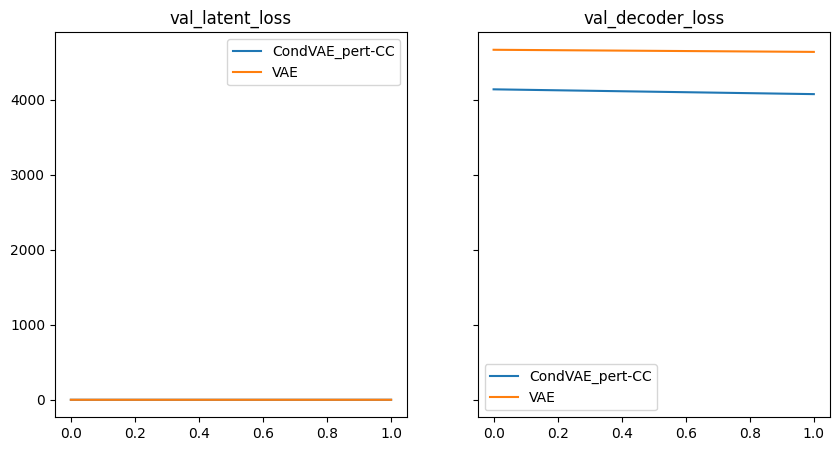

In [22]:
comp.plot_history(values=["val_latent_loss", "val_decoder_loss"])
# comp.plot_final_score(score="val_decoder_loss", fallback_score="val_loss", save_prefix="decoder_loss_")
# comp.plot_per_channel_mse()

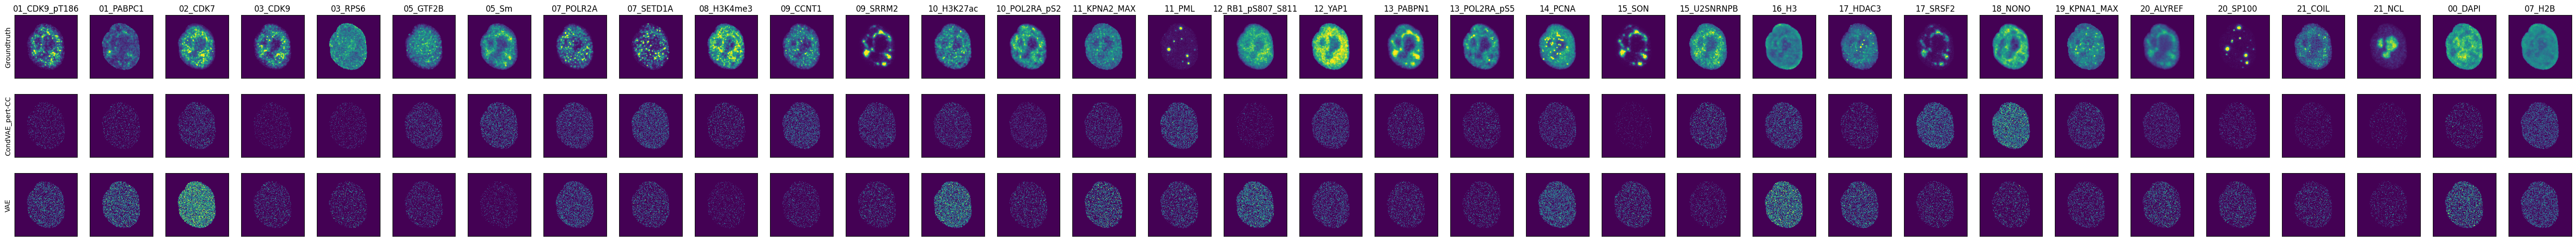

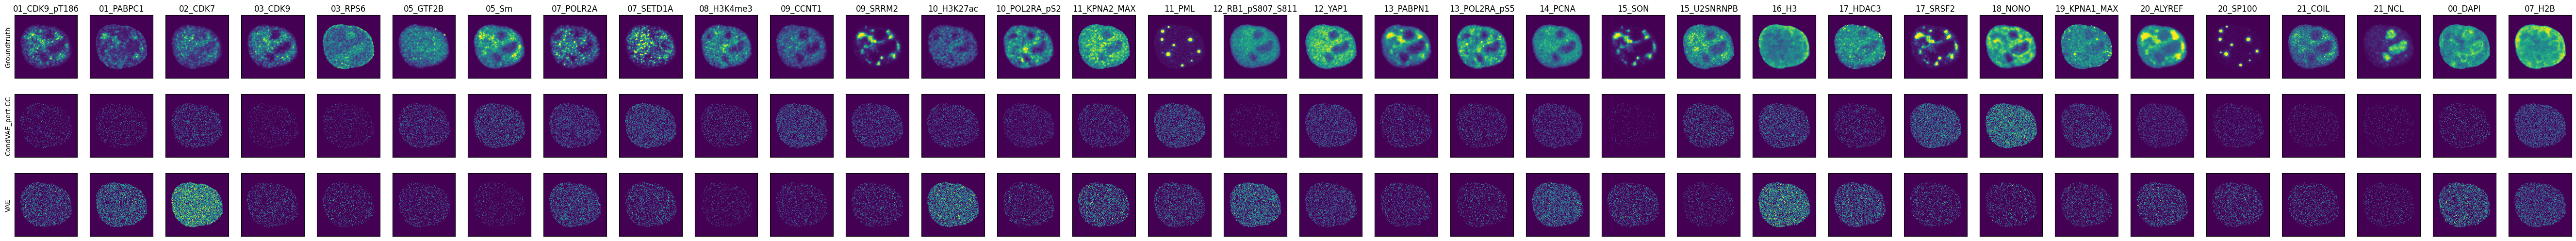

In [19]:
comp.plot_predicted_images(
    img_ids=[
        0,
        1,
    ],
    img_size=225,
)

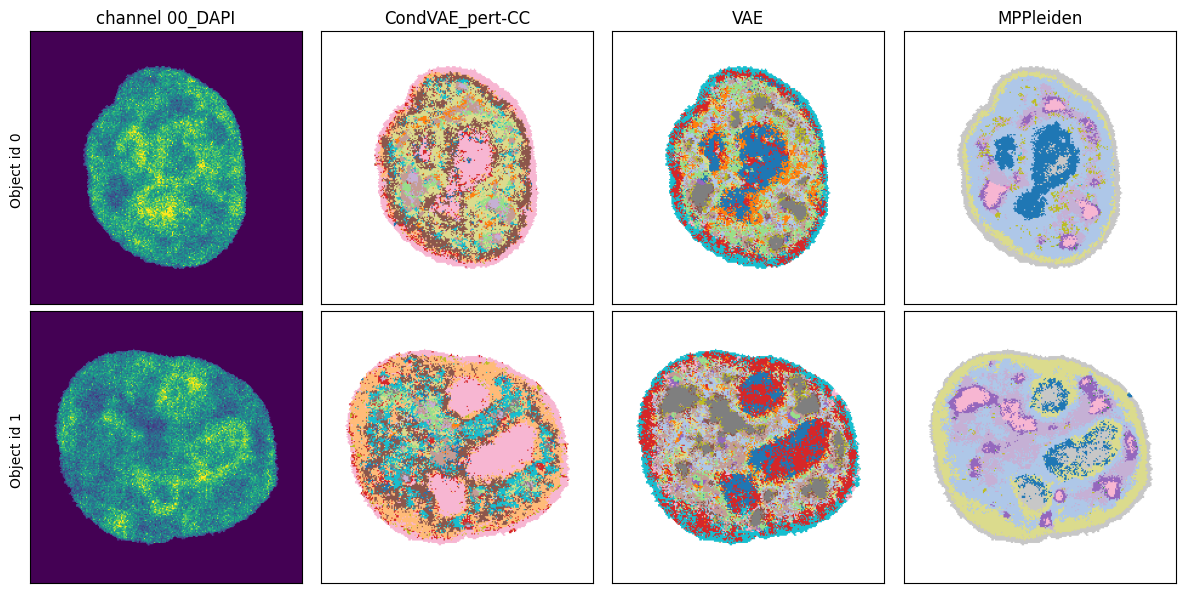

In [20]:
comp.plot_cluster_images(
    img_ids=[
        0,
        1,
    ],
    img_size=225,
    img_channel="00_DAPI",
)

In [21]:
mpp_data = MPPData.from_data_dir("/home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments/torch_test/CondVAE_pert-CC/results_epoch000/val_imgs", data_config="ExampleData", optional_keys=["decoder", "latent"])
print(mpp_data)
print("latent: ",mpp_data.data("latent").shape)
print("decoder: ",mpp_data.data("decoder").shape)

MPPData for ExampleData (40812 mpps with shape (1, 1, 34) from 2 objects). Data keys: ['obj_ids', 'x', 'y', 'mpp', 'decoder', 'latent'].
latent:  (40812, 16)
decoder:  (40812, 34)
